In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install textacy

     |████████████████████████████████| 184kB 7.6MB/s 
     |████████████████████████████████| 1.9MB 16.1MB/s 
     |████████████████████████████████| 481kB 51.9MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp36-cp36m-linux_x86_64.whl size=1225588 sha256=6620f31dc6cb3c4933fdca3bbe0cc8e8d509215be6050d362b2bd0ed03e24110
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built cytoolz


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=35ccb904c9dfe8e78c1ee20360afceded3fbb387b34caac6fc721a01d10cdd85
  Stored in directory: /tmp/pip-ephem-wheel-cache-xofupnee/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
!python -m spacy link en_core_web_lg enn


✘ Link 'enn' already exists
To overwrite an existing link, use the --force flag



In [ ]:
import os

In [ ]:
os.chdir("drive/My Drive/thesis_work/analysis/datasets")

FileNotFoundError: ignored

In [ ]:
import pandas as pd

df = pd.read_csv("rq2AccResps.csv")
df.head()

,Unnamed: 0,usertoken,date,preq_gender,preq_race,preq_education,preq_age,postq_economic,postq_social,postq_attention1,postq_attention2,person_index,condition,familiarity,favorability,familiarity_number,favorability_number,condition_person,condition_accAlias,condition_personCluster,condition_showImage,count_tweets,sourceComment,credibility_choice,credibility_uncertainty,credibility_time,politicalOrientation_choice,politicalOrientation_uncertainty,politicalOrientation_time,inst_credibleCertainChoice,inst_credibleCertainUncertainty,inst_nCredibleNCertain,inst_nCredibleNCertainUncertainty,condition_imageIdx,credibility_choice_binary
0,0,hZ9d7Zk9,10/06/20,Male,White/Caucasian/European,Undergraduate,49,Slightly liberal,Very liberal,Take a shower and get ready to go to the inter...,I may or may not leave money on the counter an...,0,noImage,Extremely familiar,Slightly negative,2,-1,Kim Jong-un,P,132,False,5,There was nothing other than straight up repor...,0.818727,0.004793,1.602005e+12,0.024001,0.105437,1.602005e+12,NaN,NaN,NaN,NaN,NaN,1
1,1,hZ9d7Zk9,10/06/20,Male,White/Caucasian/European,Undergraduate,49,Slightly liberal,Very liberal,Take a shower and get ready to go to the inter...,I may or may not leave money on the counter an...,1,noImage,Extremely familiar,Slightly Positive,2,1,Hillary Clinton,L,100,False,6,This seems like a bullshit thing. I follow pol...,0.174121,0.138986,1.602006e+12,0.421787,0.268386,1.602006e+12,NaN,NaN,NaN,NaN,NaN,0
2,2,hZ9d7Zk9,10/06/20,Male,White/Caucasian/European,Undergraduate,49,Slightly liberal,Very liberal,Take a shower and get ready to go to the inter...,I may or may not leave money on the counter an...,2,noImage,Extremely familiar,Neutral,2,0,Theresa May,K,122,False,6,Just straight factual reporting.,0.943335,0.023963,1.602006e+12,0.009623,0.057511,1.602006e+12,NaN,NaN,NaN,NaN,NaN,1
3,3,hZ9d7Zk9,10/06/20,Male,White/Caucasian/European,Undergraduate,49,Slightly liberal,Very liberal,Take a shower and get ready to go to the inter...,I may or may not leave money on the counter an...,3,noImage,Extremely familiar,Very negative,2,-2,Donald Trump,I,129,False,5,"Seems mostly straight, but with some typos or ...",0.389789,0.134193,1.602006e+12,0.162986,0.364238,1.602006e+12,NaN,NaN,NaN,NaN,NaN,0
4,4,hZ9d7Zk9,10/06/20,Male,White/Caucasian/European,Undergraduate,49,Slightly liberal,Very liberal,Take a shower and get ready to go to the inter...,I may or may not leave money on the counter an...,4,noImage,Extremely familiar,Very Positive,2,2,Angela Merkel,N,126,False,7,Seems mostly straight up reporting. A bit of b...,0.615041,0.162949,1.602006e+12,-0.091022,0.603869,1.602006e+12,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df = df.dropna(subset=['sourceComment'])
df.shape

(881, 35)

In [ ]:
nadf = pd.isna(df['sourceComment'])
df['sourceComment'][90:100]

97     The tweets were information he has shared that...
98     The tweets seemed to be legit and not biased. ...
99     This seems to be more information shared that ...
100    Nothing seemed bias in a hard way. There was s...
101    They seem to just be sharing information, not ...
102    Everything is stated matter of factly and with...
103    Everything is stated matter of factly and with...
104    Almost everything is stated matter of factly a...
105    Most things that are stated are factual, but b...
106    Everything is stated in a matter of fact way a...
Name: sourceComment, dtype: object

In [ ]:
len(df)

881

In [ ]:
texts = [_ for _ in df['sourceComment'] if pd.notnull(_)] 
len(texts)

881

In [ ]:
import spacy
import textacy

In [ ]:
num = 200
en = textacy.load_spacy_lang("enn") #, disable=("parser",)
doc = textacy.make_spacy_doc(texts[num], lang=en)
doc._.preview

'Doc(40 tokens: "The account seems credible as it\'s mostly repor...")'

In [ ]:
# # ## add in metadata

# metadata = {
#     "Condition": df.condition,
#     "ConditionPerson": df.condition_person,
#     "EconomicPostQ": df.postq_economic,
#     "SocialPostQ": df.postq_social
# }

# for text in texts:
#     doc = textacy.make_spacy_doc((text, metadata), lang=en)

In [ ]:
import textacy.vsm 

corpus = textacy.corpus.Corpus(lang=en, data=texts) #data=texts
#corpus.save("textacy_corpus.bin.gz")

word_counts = corpus.word_counts(as_strings=True)

sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:25]

[('-PRON-', 1199),
 ('tweet', 438),
 ('like', 127),
 ('Trump', 127),
 ('biased', 117),
 ('bias', 112),
 ('image', 109),
 ('credible', 105),
 ('source', 105),
 ('fact', 93),
 ('think', 93),
 ('right', 88),
 ('lean', 88),
 ('negative', 87),
 ('account', 86),
 ('news', 82),
 ('opinion', 77),
 ('picture', 73),
 ('neutral', 72),
 ('text', 69),
 ('left', 66),
 ('feel', 65),
 ('Obama', 65),
 ('report', 58),
 ('factual', 57)]

In [ ]:
doc_counts = corpus.word_doc_counts(as_strings=True)

sorted(doc_counts.items(), key=lambda x: x[1], reverse=True)[:5]

[('-PRON-', 552),
 ('tweet', 375),
 ('like', 114),
 ('bias', 108),
 ('biased', 108)]

In [ ]:
corpus.n_docs, corpus.n_sents, corpus.n_tokens

(881, 1399, 20221)

### Get Keywords

In [ ]:
# import textacy.ke

# min_rank = 0.001

# kw = (textacy.ke.textrank(doc, normalize="lower", window_size=2, edge_weighting="binary", topn=500) for doc in corpus)

# kw_dict = {}

# for index, k in enumerate(kw):
#     k2 = [i for i in k ] # if i[1] > min_rank
#     kw_dict.update({index: k2})

In [ ]:
# kw_dict[0]

[]

In [ ]:
# s = set()

# for keys, i in kw_dict.items():
# #    print(i)
#     for j in i:
#         s.add(j[0])
        
# len(s)

1266

In [ ]:
#vectorizer.vocabulary_terms

### Vectorizer / DTM

In [ ]:
from textacy.vsm import Vectorizer

tokenized_docs = (doc._.to_terms_list(entities=False, as_strings=True, normalize = "lower") for doc in corpus) #  
# do tf-idf
vectorizer = Vectorizer(norm="l2", apply_idf=True, max_df=0.95) # , vocabulary_terms = s, max_df=0.95, min_df=5, norm="l2", apply_idf=True, 
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)
doc_term_matrix

<881x5056 sparse matrix of type '<class 'numpy.float64'>'
	with 11119 stored elements in Compressed Sparse Row format>

In [ ]:
# vectorizer.terms_list[49]

"account's perspective"

In [ ]:
# def get_col_counts(query, vectorizer, dtm):

#     word_idx = vectorizer.vocabulary_terms[query]
#     return doc_term_matrix[0:, word_idx]

# q = "uninteresting tweets"

# get_col_counts(query = q, vectorizer = vectorizer, dtm = doc_term_matrix)

<881x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

### Topic Modeling

In [ ]:
import textacy.tm

model = textacy.tm.TopicModel("nmf", n_topics=20)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape

topicTermsDict = {}
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", " , ".join(top_terms))
    topicTermsDict[topic_idx] = " , ".join(top_terms[:5])

topic 0 : left , leaning , left leaning , right , news , right leaning , think , tweets , source , tweets suggest
topic 1 : sure , tweet , explain , little bit , m , m not sure , bias for sure , tell one way , party , left bias
topic 2 : biased , wording , read , rest , tweets , pics , think , person , text , said
topic 3 : negative , positive , negative light , ones , light , negative towards trump , negative or positive , negative towards kim , negative nor positive , tweet
topic 4 : bias , given , news , way , statements , think , left bias , little bias , detect , fair
topic 5 : facts , stating , stating facts , reporting facts , reporting , tweets mostly report , commentary , report , tweets , reporting on facts
topic 6 : political , orientation , source , political orientation , credibility , gave , good , indication , good indication , political leaning
topic 7 : tweets were worded , worded , pleasant or unpleasant , depended , unpleasant , pleasant , person was pleasant , pictu

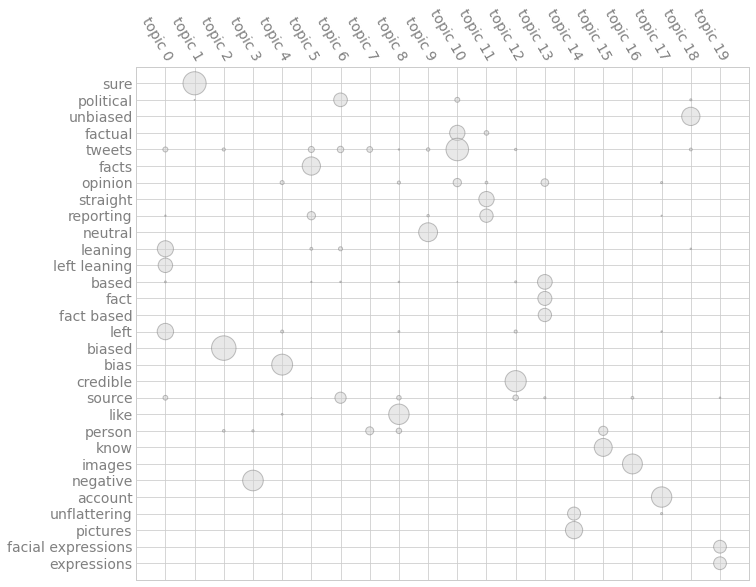

In [ ]:
model.termite_plot(doc_topic_matrix, vectorizer.id_to_term, topics=-1,  n_terms=30, sort_terms_by="seriation",save="study2_topics.jpg")

In [ ]:
doc_topics = list(model.top_doc_topics(doc_topic_matrix=doc_topic_matrix,docs=-1,top_n=2))

In [ ]:
df[["top_topic","second_top_topic"]] = [i[1] for i in doc_topics]

In [ ]:
df["top_topic_terms"] = df["top_topic"].apply(lambda x: topicTermsDict[x])

In [ ]:
df.groupby("top_topic",as_index=False).agg({"usertoken":"nunique","date":"count",'top_topic_terms':"first"}).sort_values("usertoken",ascending=False)

,top_topic,usertoken,date,top_topic_terms
10,10,51,92,"tweets , factual , opinion , information , little"
0,0,40,67,"left , leaning , left leaning , right , news"
8,8,35,51,"like , feel , feel like , sound , sound like"
19,19,34,71,"facial expressions , expressions , facial , an..."
3,3,33,46,"negative , positive , negative light , ones , ..."
16,16,32,66,"images , given , negative bias , bad , text"
9,9,31,47,"neutral , pretty neutral , fairly neutral , pr..."
4,4,31,46,"bias , given , news , way , statements"
6,6,31,50,"political , orientation , source , political o..."
2,2,27,38,"biased , wording , read , rest , tweets"


In [29]:
df['usertoken'].nunique()

116

In [ ]:
for i in model.top_topic_docs(doc_topic_matrix=doc_topic_matrix,topics=-1,top_n=20):
  topic_id = i[0]
  top_terms = list(model.top_topic_terms(vectorizer.id_to_term, top_n=10,topics=topic_id))[0][1]
  print("topic", topic_id, ":", " , ".join(top_terms))
  for doc_id in i[1]:
    row = df.iloc[doc_id]
    print("****")
    print(row["condition_person"])
    print(row["condition"])
    print(row["sourceComment"])
  print("------------------------------------------------------------------")
  print("------------------------------------------------------------------")

topic 0 : left , leaning , left leaning , right , news , right leaning , think , tweets , source , tweets suggest
****
Angela Merkel
noImage
seems more left leaning and just news
****
Emanuel Macron
noImage
The tweets suggest that they are more left leaning. 
****
Hillary Clinton
happy
A lot of these tweets were left leaning but on the favorable side toward other democrats.
****
Angela Merkel
happy
The negative tone about Trump made me believe it was left leaning. 
****
Vladimir Putin
happy
The tone of the tweets were anti Putin and since the right seems to be in bed with him, the bias in the tweets must be from the left leaning side. 
****
Donald Trump
happy
Some of the tweets implied that the account didn't like Trump, so I assumed that they were more left leaning.
****
Kim Jong-un
angry
He seemed to ask questions that were left leaning and biased and some tweets were just factual. 
****
Kim Jong-un
angry
I think most tweets are highly credible and perhaps a little more left leaning.

### UMAP on NMF

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
conditions = [_ for _ in df['condition_person']]
ids = [_ for _ in df['usertoken'] + df['condition_person']]

In [ ]:
import umap
mapper = umap.UMAP().fit_transform(doc_topic_matrix)
umap_df = pd.DataFrame(mapper, columns=["X","Y"])
umap_df['color'] = conditions
umap_df['text'] = texts
umap_df['id'] = ids
umap_df.shape

(881, 5)

In [ ]:
umap_df[70:80].head(n=10)

,X,Y,color,text,id
70,0.998401,6.015814,Donald Trump,Most of the tweets were factually based and no...,mXiGMCRpDonald Trump
71,1.629655,4.217087,Theresa May,The tweets influenced my decision completely a...,wEUXBjv7Theresa May
72,7.146394,1.219937,Vladimir Putin,The tweets influenced me because some of the t...,wEUXBjv7Vladimir Putin
73,7.418046,1.371371,Donald Trump,The tweets definitely influenced my decisions ...,wEUXBjv7Donald Trump
74,4.396937,-1.922120,Emanuel Macron,The tweets helped me influence my decisions be...,wEUXBjv7Emanuel Macron
75,6.465334,0.377675,Hillary Clinton,The tweets influenced me a bit because some of...,wEUXBjv7Hillary Clinton
76,3.648073,-2.582604,Kim Jong-un,THe tweet influenced me because they have abun...,wEUXBjv7Kim Jong-un
77,5.872616,-0.138732,Angela Merkel,The tweets definitely influenced me because th...,wEUXBjv7Angela Merkel
78,5.570666,-0.422279,Barack Obama,The tweets influenced me greatly because the i...,wEUXBjv7Barack Obama
79,4.501512,2.139294,Angela Merkel,"The tone was sober, the content wasn't inflamm...",RUbrEC4rAngela Merkel


In [ ]:
import altair as alt

brush = alt.selection(type='interval')

# nearest = alt.selection(type='single', nearest=True, on='mouseover',
#                         fields=['x','y'], empty='none')

points = alt.Chart(umap_df).mark_point(filled=True, size = 25, opacity= 0.4).encode(
    x='X',
    y='Y',
    #color='black',
    fill=alt.condition(brush, 'color:N', alt.value('grey')),
    #fill='color:N',
    tooltip=["text:N","id"]
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(umap_df).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
text = ranked_text.encode(text='text:N').properties(title='Text')
condition = ranked_text.encode(text='color:N').properties(title='Condition')
#id = ranked_text.encode(text='Origin:N').properties(title='Origin')
text = alt.hconcat(text, condition) # Combine data tables

# Build chart
alt.vconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

alt.VConcatChart(...)